# 1. Load libraries

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ConstantKernel as C
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Exploratory Data Analysis (EDA)

### 1. Loading data and Checking for the basic info




In [3]:
shoppers_df = pd.read_csv('/content/online_shoppers_intention.csv')
shoppers_df.shape

(12330, 18)

In [4]:
shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### 2. Data Cleaning

In [6]:
shoppers_df.dropna()
print(shoppers_df.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [7]:
duplicate_rows = shoppers_df.duplicated().sum()
df_cleaned = shoppers_df.drop_duplicates()
print("Number of duplicate rows:", duplicate_rows)
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Number of duplicate rows: 125
Shape of cleaned DataFrame: (12205, 18)


In [8]:
df_cleaned = df_cleaned.copy()
df_cleaned['Revenue'] = df_cleaned['Revenue'].astype(int)
df_cleaned['Revenue']

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


In [9]:
unique_counts = df_cleaned.nunique()
unique_counts

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


### 2. Descriptive Statistics

In [10]:
summary_stats = df_cleaned.describe(include='all')
summary_stats.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12205.0,NaN,NaN,NaN,2.338878,3.330436,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12205.0,NaN,NaN,NaN,81.646331,177.491845,0.0,0.0,9.0,94.7,3398.75
Informational,12205.0,NaN,NaN,NaN,0.508726,1.275617,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12205.0,NaN,NaN,NaN,34.825454,141.424807,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12205.0,NaN,NaN,NaN,32.045637,44.593649,0.0,8.0,18.0,38.0,705.0
ProductRelated_Duration,12205.0,NaN,NaN,NaN,1206.982457,1919.6014,0.0,193.0,608.942857,1477.154762,63973.52223
BounceRates,12205.0,NaN,NaN,NaN,0.02037,0.045255,0.0,0.0,0.002899,0.016667,0.2
ExitRates,12205.0,NaN,NaN,NaN,0.041466,0.046163,0.0,0.014231,0.025,0.048529,0.2
PageValues,12205.0,NaN,NaN,NaN,5.949574,18.653671,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12205.0,NaN,NaN,NaN,0.061942,0.199666,0.0,0.0,0.0,0.0,1.0


In [11]:
shoppers_df = df_cleaned.copy()
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [12]:
#  === EDA Summary  ===
#  Dataset: 12,330 rows, 18 columns
#  125 duplicate rows removed → 12,205 rows remain
#  No missing values
#  Mix of numerical, categorical, and binary target ('Revenue')
#  Many features are skewed with outliers (e.g., ProductRelated_Duration)
#  Revenue is highly imbalanced (majority = False)

### 3. Univariate Analysis for both numerical and categorical
* For numerical - Plotting Histograms with KDE and Boxplots





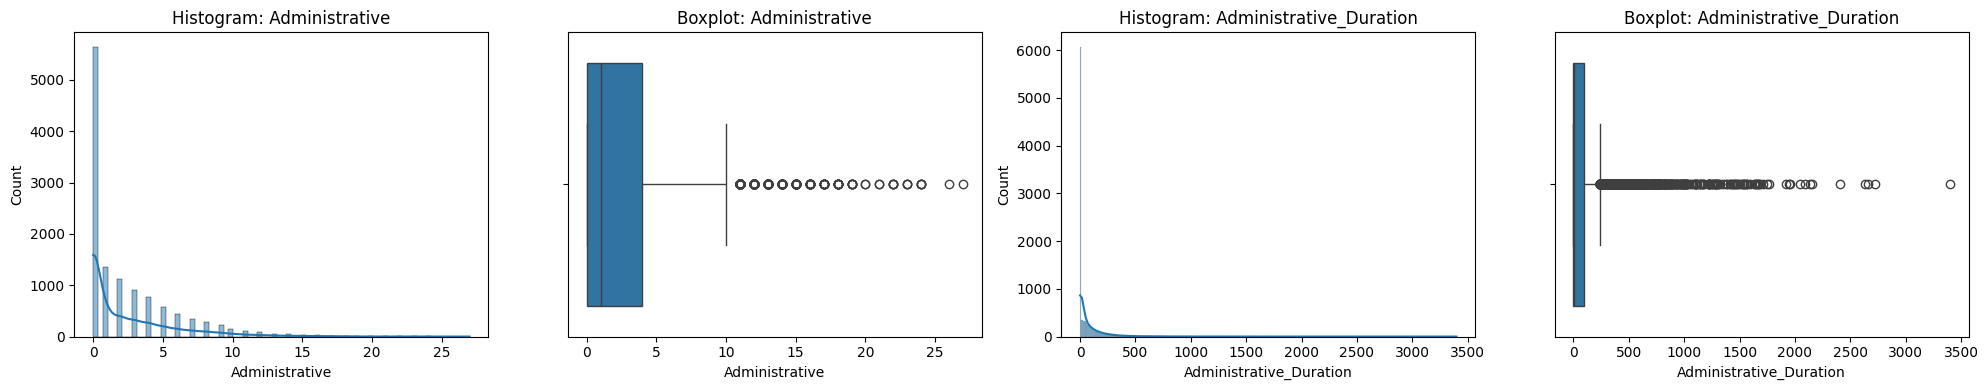

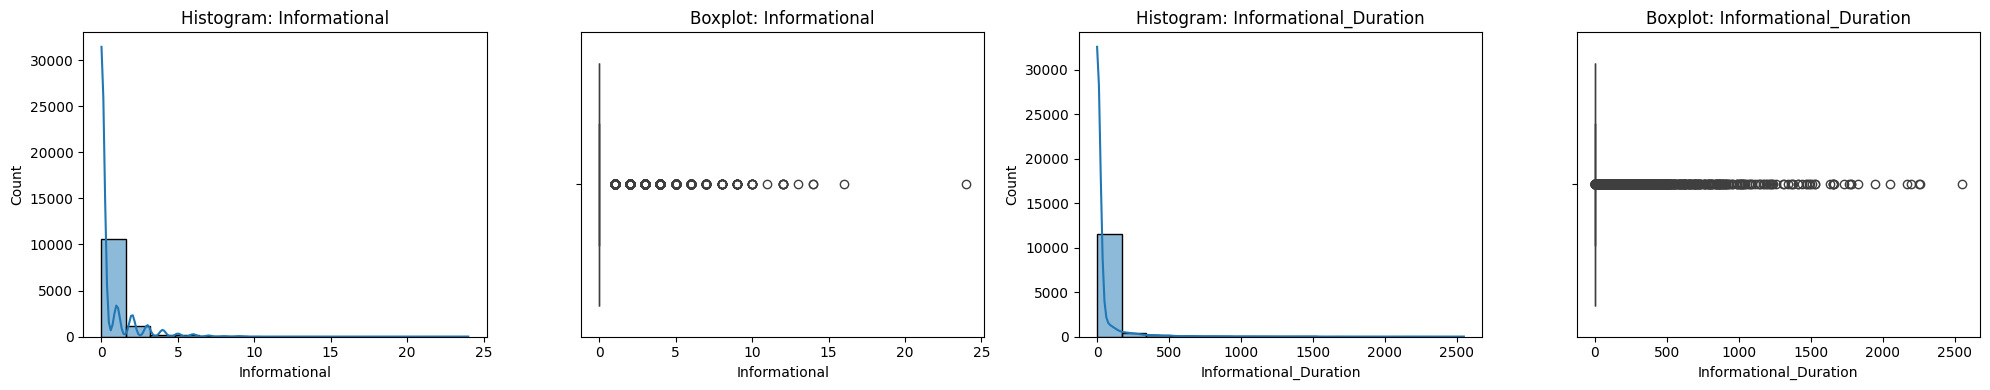

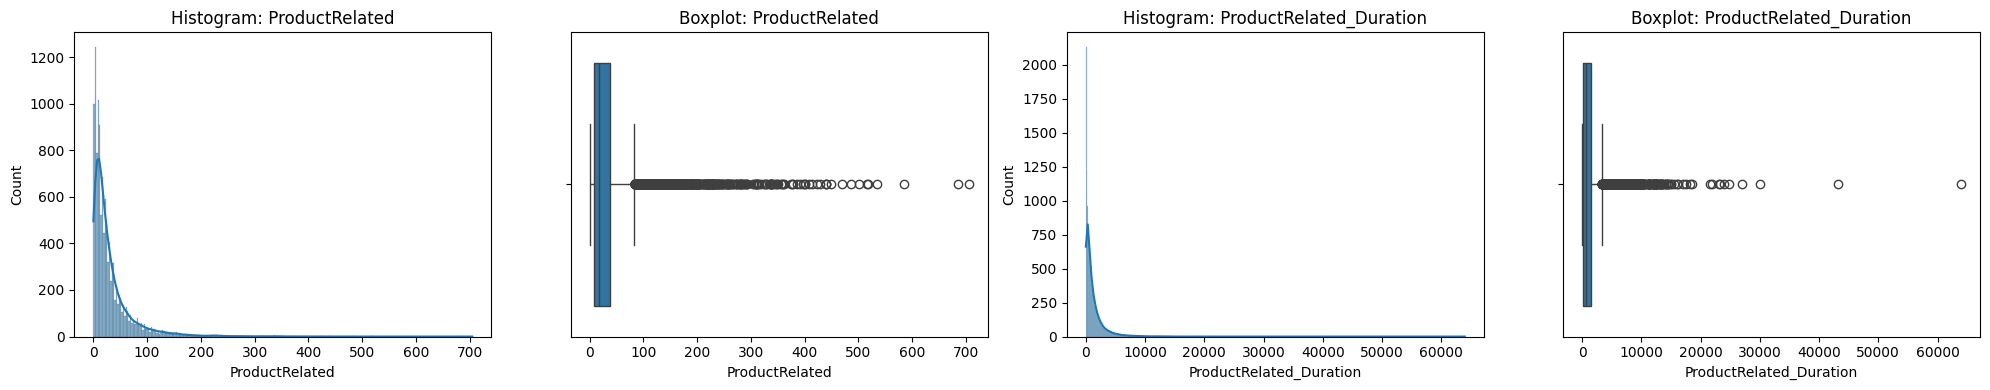

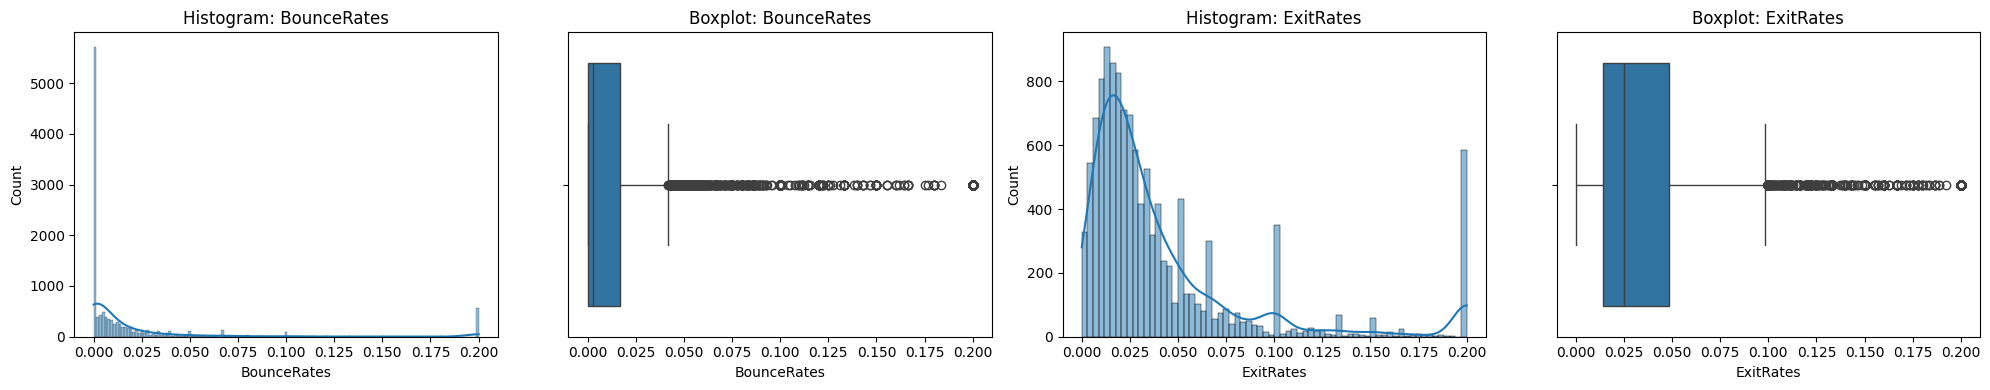

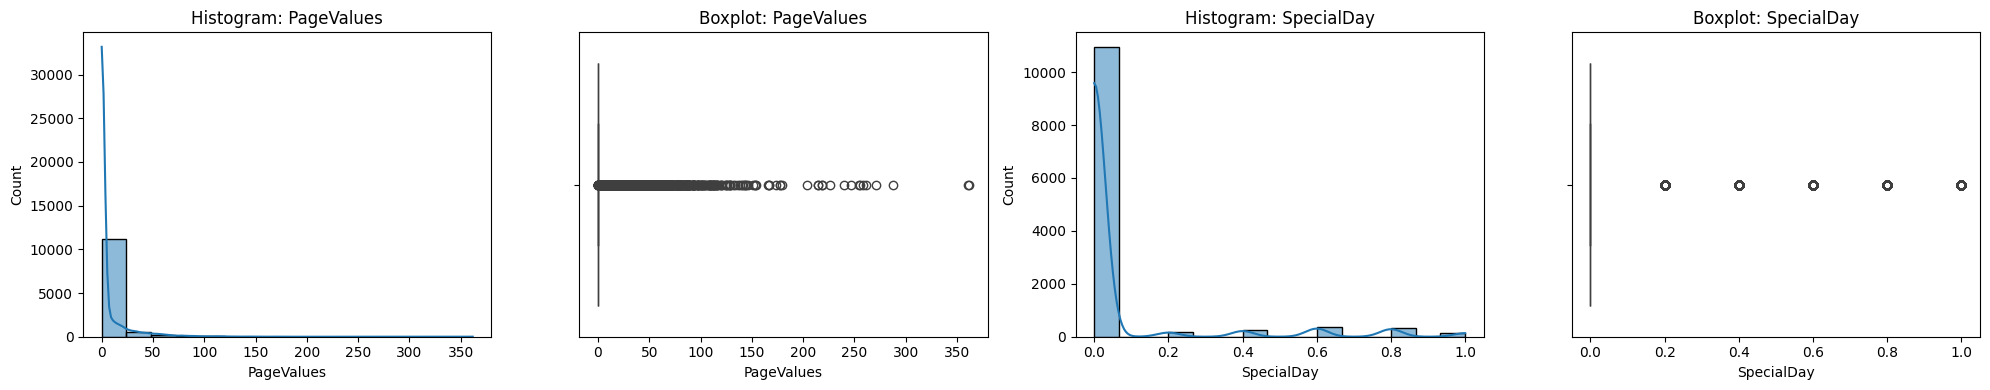

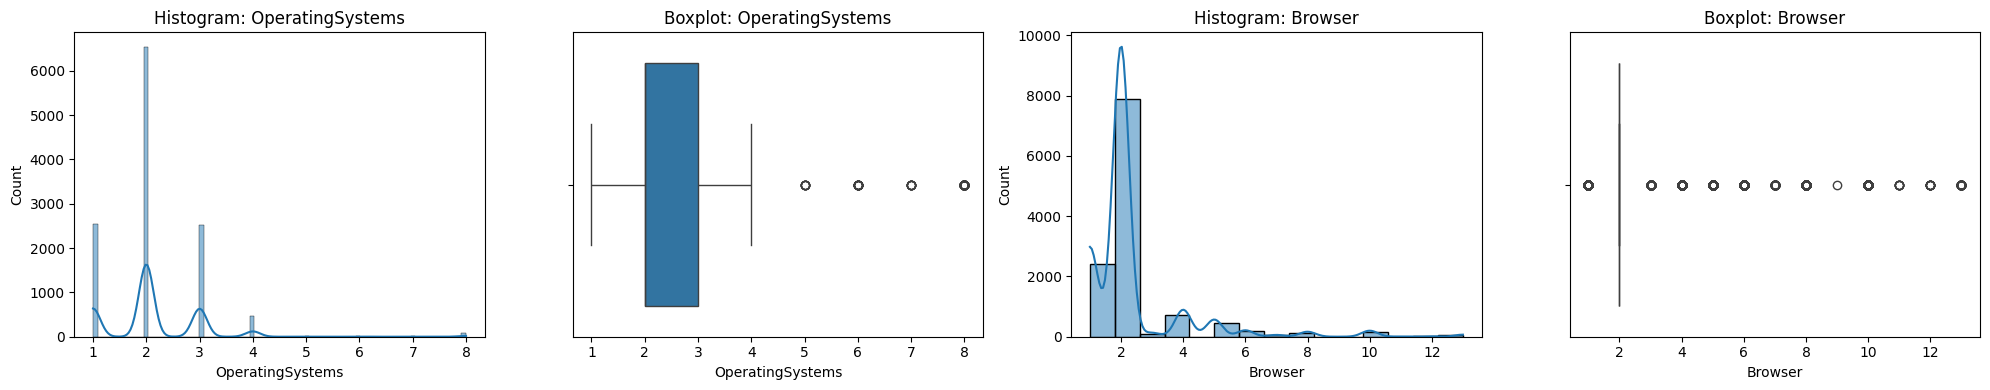

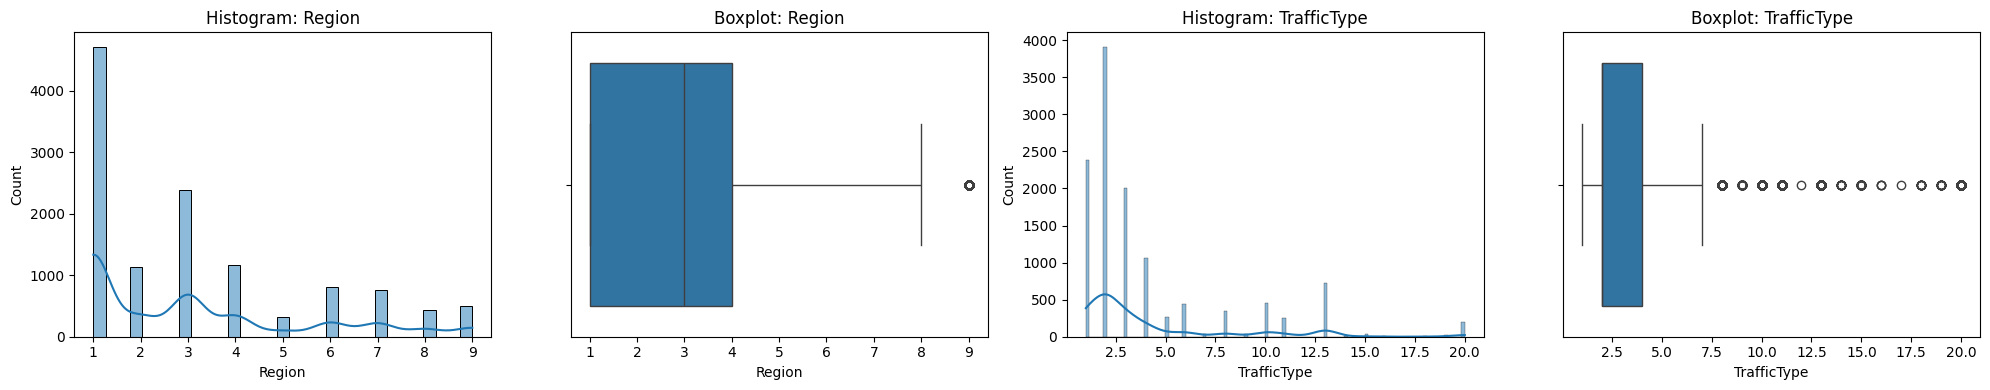

In [13]:
num_cols = shoppers_df.select_dtypes(include=['float64', 'int64']).columns.drop('Revenue', errors='ignore')
for i in range(0, len(num_cols), 2):
    col1 = num_cols[i]
    col2 = num_cols[i + 1] if i + 1 < len(num_cols) else None

    fig, axes = plt.subplots(1, 4, figsize=(20, 4))

    # Feature 1: Histogram and Boxplot
    sns.histplot(shoppers_df[col1], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram: {col1}')

    sns.boxplot(x=shoppers_df[col1], ax=axes[1])
    axes[1].set_title(f'Boxplot: {col1}')

    if col2:
        # Feature 2: Histogram and Boxplot
        sns.histplot(shoppers_df[col2], kde=True, ax=axes[2])
        axes[2].set_title(f'Histogram: {col2}')

        sns.boxplot(x=shoppers_df[col2], ax=axes[3])
        axes[3].set_title(f'Boxplot: {col2}')
    else:
        # If no second feature, hide the remaining plots
        axes[2].axis('off')
        axes[3].axis('off')

    plt.tight_layout()
    plt.show()


For categorical features:
* Frequency Counts
* Bar Charts + Pie Charts


In [14]:
categorical_cols = ['Month', 'VisitorType', 'Weekend']
frequency_counts = {col: shoppers_df[col].value_counts() for col in categorical_cols}
frequency_counts

{'Month': Month
 May     3329
 Nov     2982
 Mar     1860
 Dec     1706
 Oct      549
 Sep      448
 Aug      433
 Jul      432
 June     285
 Feb      181
 Name: count, dtype: int64,
 'VisitorType': VisitorType
 Returning_Visitor    10431
 New_Visitor           1693
 Other                   81
 Name: count, dtype: int64,
 'Weekend': Weekend
 False    9346
 True     2859
 Name: count, dtype: int64}

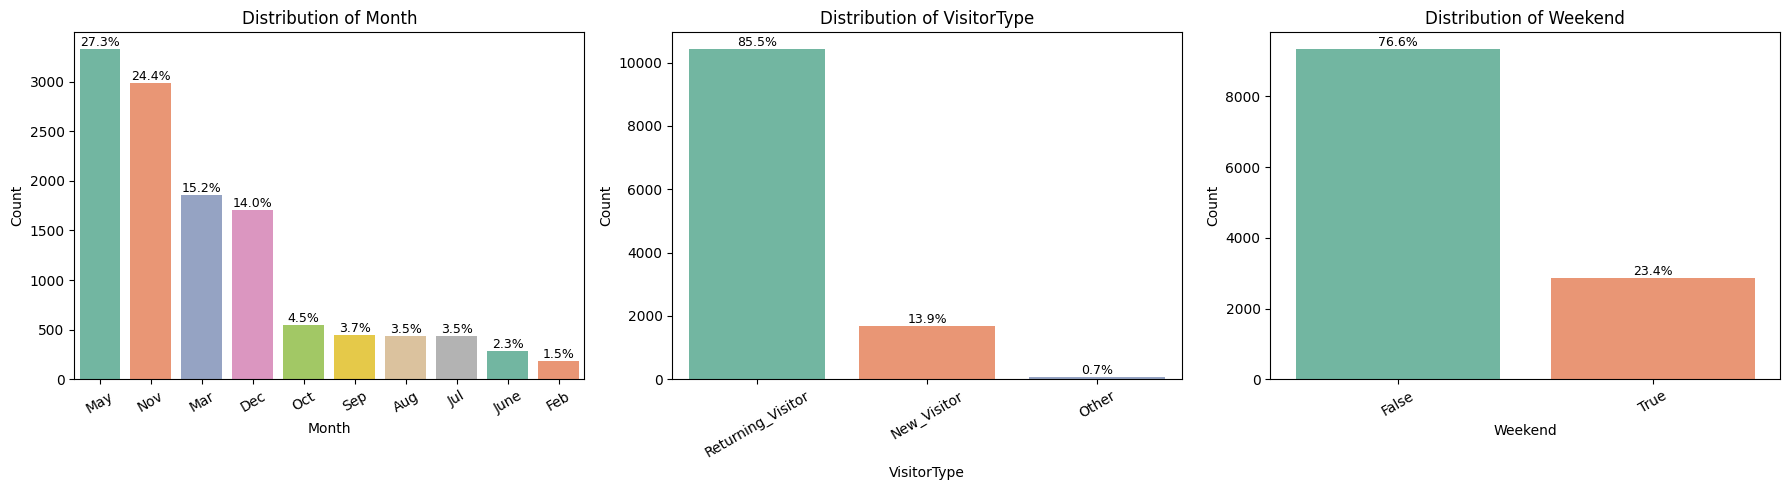

In [15]:
cols = ['Month', 'VisitorType', 'Weekend']
fig, axes = plt.subplots(1, len(cols), figsize=(18, 5))

for ax, col in zip(axes, cols):
    data = shoppers_df[col].value_counts()
    sns.countplot(x=shoppers_df[col], order=data.index, ax=ax, palette='Set2', hue=None, legend=False)

    for p in ax.patches:
        pct = f'{100 * p.get_height() / len(shoppers_df):.1f}%'
        ax.annotate(pct, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=9)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

In [16]:
# === Univariate Insights ===

# Numerical:
# • Most features are right-skewed with long tails (e.g., durations, PageValues).
# • Extreme outliers in features like ProductRelated_Duration.
# • Discrete patterns observed in Region, Browser, TrafficType.
# • Sparse values in SpecialDay; log scaling may aid GPR.

# Categorical:
# • 'Month': Peaks in May (27.3%) and Nov (24.4%) → seasonal trend.
# • 'VisitorType': 85.4% are Returning Visitors → class imbalance.
# • 'Weekend': 76.6% sessions on weekdays → weekday bias.



### 4. Bivariate/Multivariate Analysis

**Correlation** **matrix**


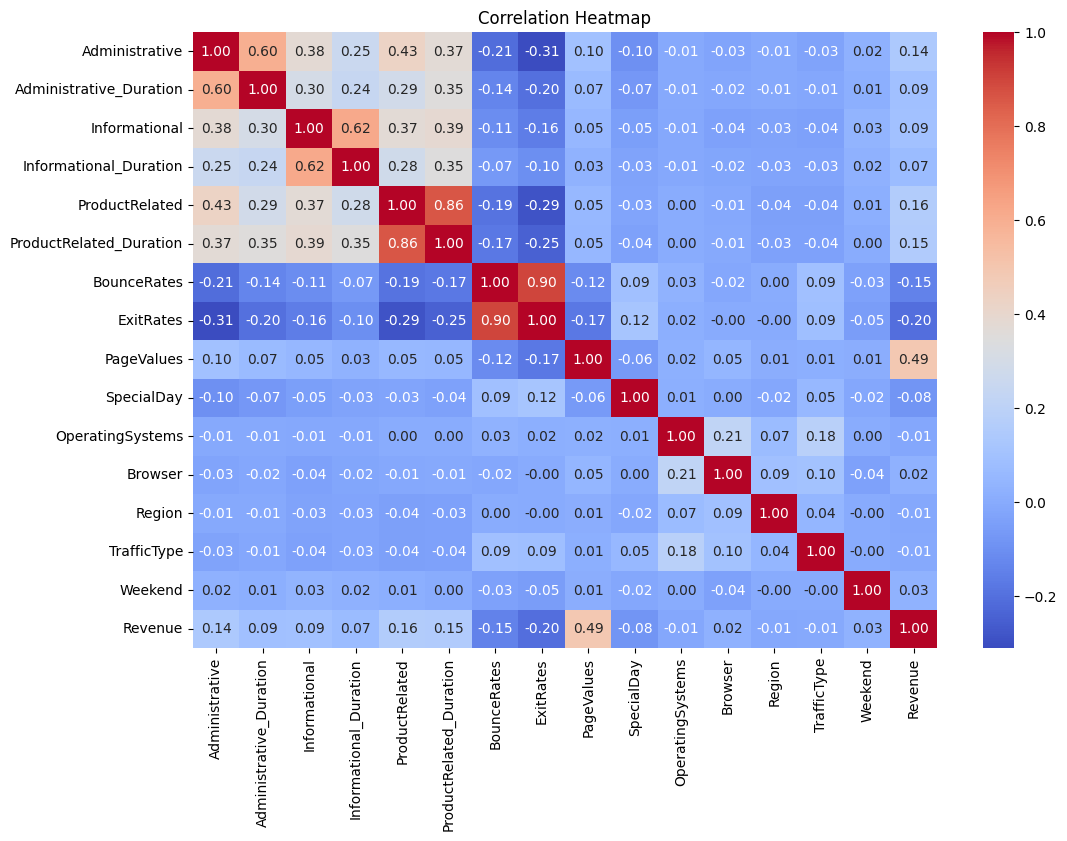

In [17]:

plt.figure(figsize=(12, 8))
sns.heatmap(shoppers_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Pair plots for selected features**

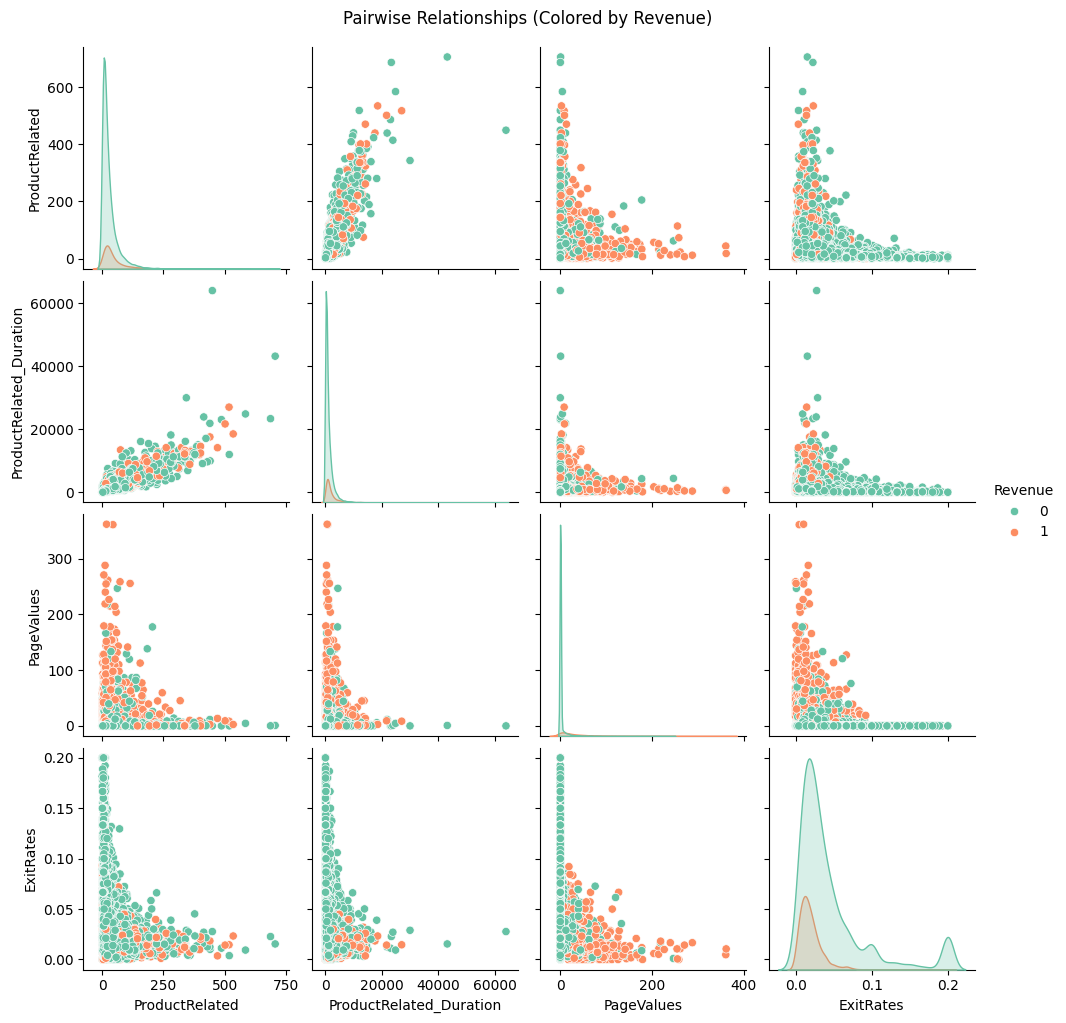

In [18]:
selected_cols = ['ProductRelated', 'ProductRelated_Duration', 'PageValues', 'ExitRates', 'Revenue']
sns.pairplot(shoppers_df[selected_cols], hue='Revenue', palette='Set2', diag_kind='kde')
plt.suptitle("Pairwise Relationships (Colored by Revenue)", y=1.02)
plt.show()


In [19]:
# === Bivariate Analysis ===

# --- Correlation Heatmap ---
# • Highlights linear relationships between numerical features.
# • ProductRelated ↔ ProductRelated_Duration (r = 0.86) → potential redundancy.
# • BounceRates ↔ ExitRates (r = 0.90) → overlapping user behavior signals.
# • PageValues correlates moderately with Revenue (r = 0.49).

# --- Pairplot for Selected Features ---
# • Scatter plots colored by Revenue class (0 or 1).
# • Visualizes actual data distribution, trends, and class overlap.
# • Partial class separation visible in PageValues and ExitRates.
# • Confirms non-linear and clustered relationships.

### 5. Revenue Association with Categorical Features

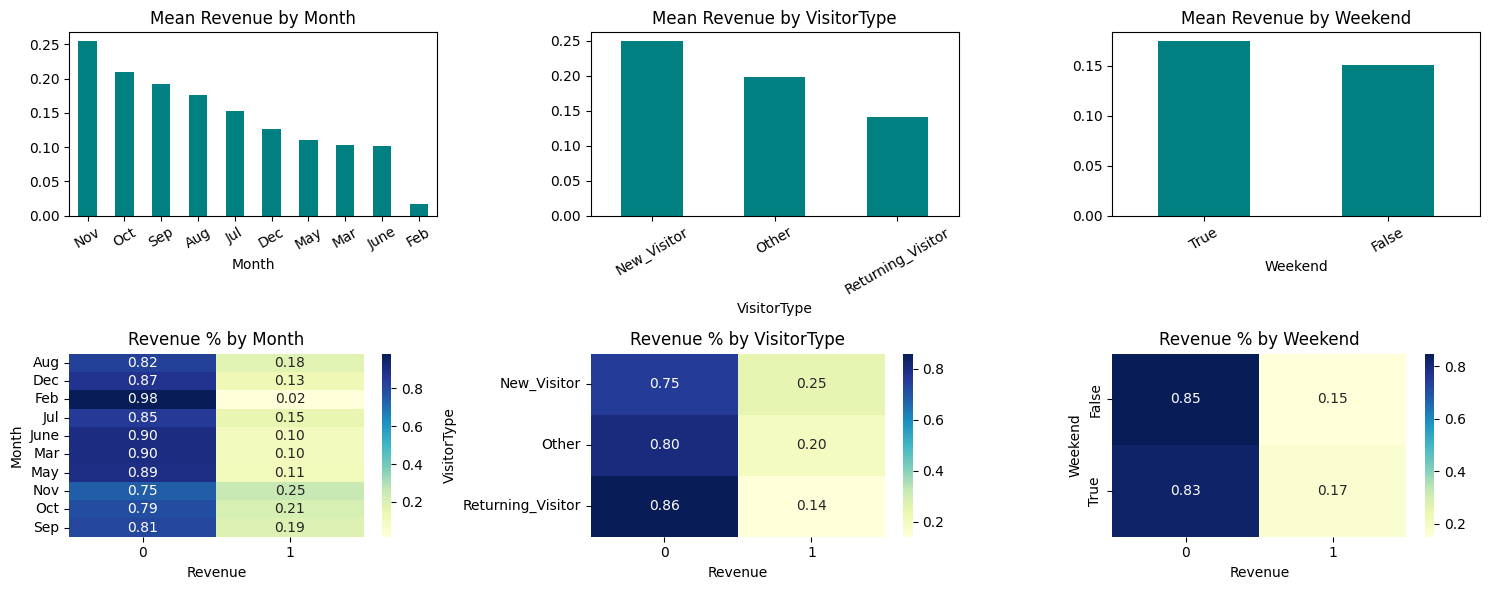

In [20]:
cols = ['Month', 'VisitorType', 'Weekend']
fig, axes = plt.subplots(2, len(cols), figsize=(5 * len(cols), 6))

for i, col in enumerate(cols):
    # Mean Revenue Bar Plot
    shoppers_df.groupby(col)['Revenue'].mean().sort_values(ascending=False).plot(
        kind='bar', ax=axes[0, i], color='teal')
    axes[0, i].set_title(f'Mean Revenue by {col}')
    axes[0, i].tick_params(axis='x', rotation=30)

    # Revenue Distribution Heatmap
    tab = pd.crosstab(shoppers_df[col], shoppers_df['Revenue'], normalize='index')
    sns.heatmap(tab, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1, i])
    axes[1, i].set_title(f'Revenue % by {col}')
    axes[1, i].set_xlabel('Revenue')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [21]:
# === Grouped Revenue Insights (Categorical Features) ===
# Bar plots show average purchase rate (mean Revenue) per category.
# Heatmaps show normalized revenue distribution across each category.
# 'New_Visitor' has highest mean conversion rate (~25%).
# Purchases peak in November and October (seasonal trend).
# Slightly higher revenue rate on weekends vs weekdays.

### 6. Distribution of the target variable

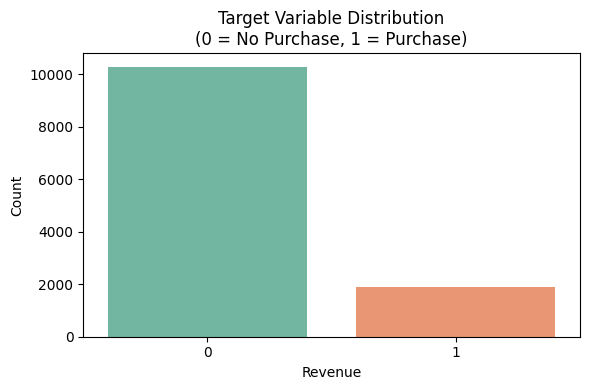

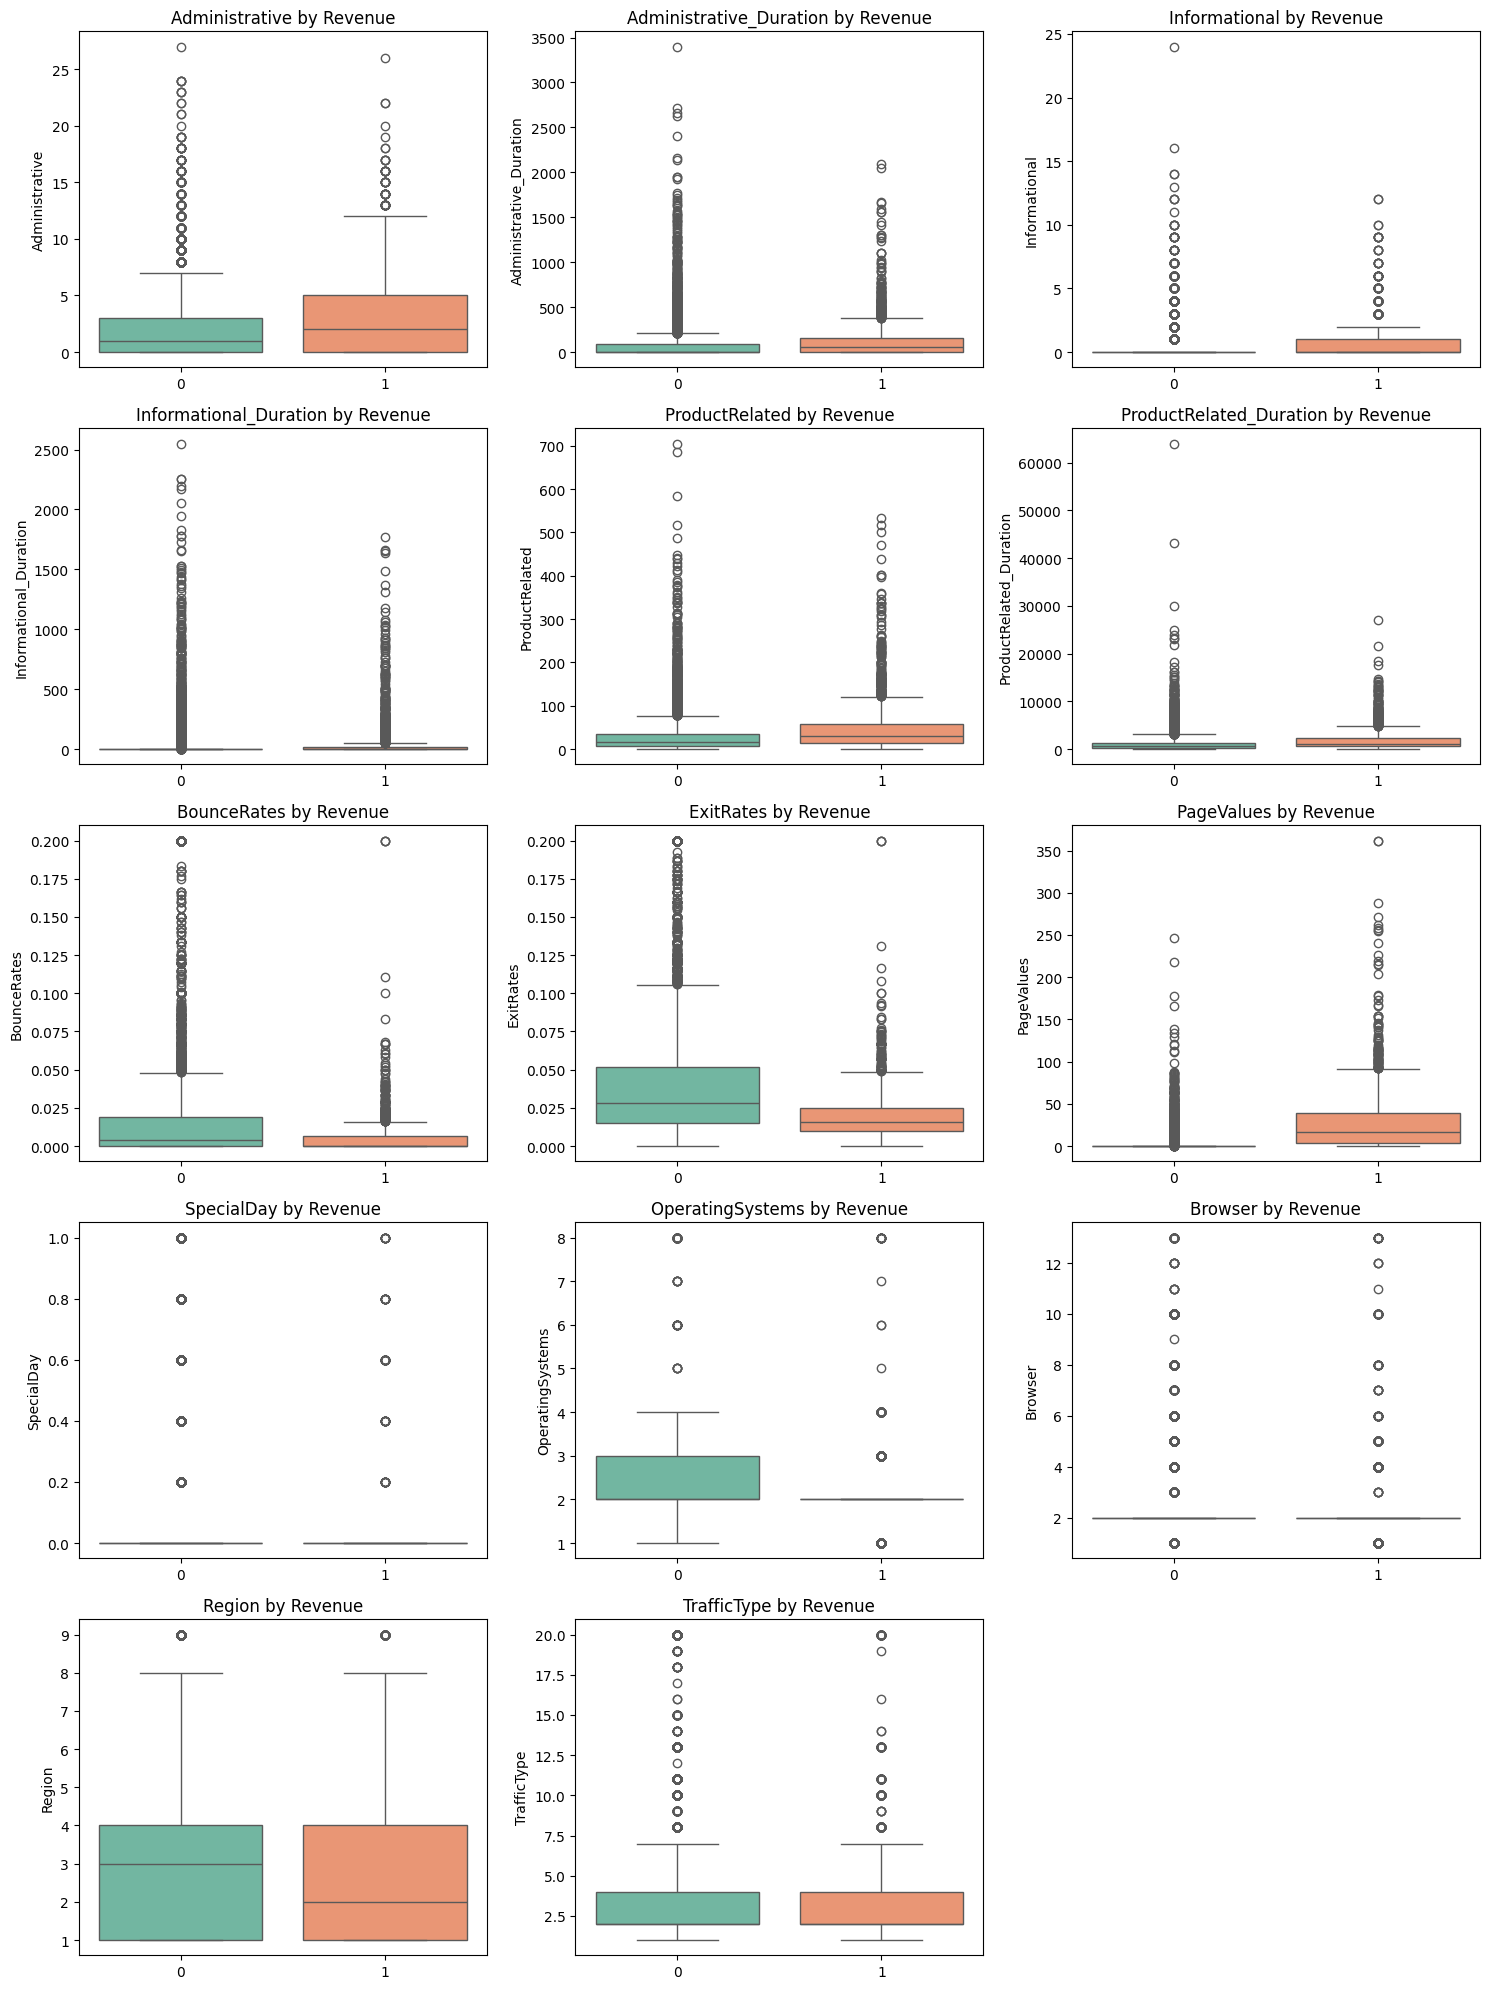

In [22]:
# --- Target Variable Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=shoppers_df, palette='Set2')
plt.title('Target Variable Distribution\n(0 = No Purchase, 1 = Purchase)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Revenue vs Numerical Features ---
num_cols = shoppers_df.select_dtypes(include=['int64', 'float64']).drop(columns='Revenue').columns
n = len(num_cols)
cols = 3
rows = -(-n // cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols):
    r, c = divmod(i, cols)
    sns.boxplot(data=shoppers_df, x='Revenue', y=col, ax=axes[r][c] if rows > 1 else axes[c], palette='Set2')
    axes[r][c].set_title(f'{col} by Revenue')
    axes[r][c].set_xlabel('')
    axes[r][c].set_ylabel(col)

# Hide any empty subplots
for j in range(i + 1, rows * cols):
    r, c = divmod(j, cols)
    axes[r][c].axis('off')

plt.tight_layout()
plt.show()

In [23]:
# === Target Variable & Numerical Feature Distributions ===
# • The target 'Revenue' is highly imbalanced (~15.6% positive class).
# • Boxplots show how numerical features differ across purchase outcomes.
# • Buyers exhibit higher engagement metrics (e.g., longer durations, higher PageValues).
# • Outliers and right-skew are present in almost all features.
# • Confirms that behavioral signals (durations, rates) are predictive for classification.

#Feature Engineering Checks

### 1. Outlier Detection using IQR and Z-Score Methods

In [24]:
num_cols = shoppers_df.select_dtypes(include=['float64', 'int64']).columns.drop('Revenue')

iqr_outliers = {}
for col in num_cols:
    Q1, Q3 = shoppers_df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = ((shoppers_df[col] < Q1 - 1.5 * IQR) | (shoppers_df[col] > Q3 + 1.5 * IQR)).sum()
    iqr_outliers[col] = {'IQR Outliers': outliers, 'IQR %': 100 * outliers / len(shoppers_df)}

z_scores = np.abs(stats.zscore(shoppers_df[num_cols]))
z_outliers = (z_scores > 3).sum(axis=0)
for col, count in zip(num_cols, z_outliers):
    iqr_outliers[col]['Z-Score Outliers'] = count

# To display vertical summary
outlier_df = pd.DataFrame(iqr_outliers).T.round(2)
display(outlier_df)

,IQR Outliers,IQR %,Z-Score Outliers
Administrative,404.0,3.31,213.0
Administrative_Duration,1149.0,9.41,230.0
Informational,2631.0,21.56,260.0
Informational_Duration,2405.0,19.71,229.0
ProductRelated,1007.0,8.25,236.0
ProductRelated_Duration,951.0,7.79,217.0
BounceRates,1428.0,11.70,593.0
ExitRates,1325.0,10.86,599.0
PageValues,2730.0,22.37,257.0
SpecialDay,1249.0,10.23,478.0


### 2. Log Transformation and Encoding

In [25]:
log_cols = ['PageValues', 'ProductRelated_Duration', 'Administrative_Duration']
df_transformed = shoppers_df.copy()
df_transformed[log_cols] = df_transformed[log_cols].apply(lambda x: np.log1p(x))

df_encoded = df_transformed.copy()
df_encoded['Weekend'] = df_encoded['Weekend'].astype(int)
df_encoded = pd.get_dummies(df_encoded, columns=['Month', 'VisitorType'], drop_first=True)


### 3. Final Validation of Preprocessed Data

In [26]:
# Confirmed Weekend is binary and dummy variables were added correctly
print("Weekend Encoding:", df_encoded['Weekend'].unique())
print("Dummy Columns:", [col for col in df_encoded.columns if 'Month_' in col or 'VisitorType_' in col])

# checking for missing values and final shape of dataset
assert df_encoded.isnull().sum().sum() == 0, " Missing values found!"
print("No missing values detected.")
print("Final Data Shape:", df_encoded.shape)

Weekend Encoding: [0 1]
Dummy Columns: ['Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']
No missing values detected.
Final Data Shape: (12205, 27)


In [27]:
final_df = df_encoded.copy()
final_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,0.000000,0,0.0,2,4.174387,0.000000,0.100000,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,0.000000,0,0.0,2,1.299283,0.050000,0.140000,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,0.000000,0,0.0,10,6.443336,0.020000,0.050000,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,4.983607,0,0.0,53,7.487057,0.007143,0.029031,2.583372,0.0,...,False,False,False,False,False,False,False,False,False,True
12326,0,0.000000,0,0.0,5,6.145794,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
12327,0,0.000000,0,0.0,6,5.221706,0.083333,0.086667,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True
12328,4,4.330733,0,0.0,15,5.849325,0.000000,0.021053,0.000000,0.0,...,False,False,False,False,False,True,False,False,False,True


### 4. Comparison of Original vs Encoded Categorical Variables

In [28]:
original_subset = shoppers_df[['Month', 'VisitorType', 'Weekend']]
encoded_subset = final_df.filter(regex='Month_|VisitorType_|Weekend')

# Concatenate original and encoded for visual comparison (first 10 rows)
comparison_df = pd.concat([original_subset, encoded_subset], axis=1).head(10)
comparison_df

,Month,VisitorType,Weekend,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
1,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
2,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
3,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
4,Feb,Returning_Visitor,True,1,False,True,False,False,False,False,False,False,False,False,True
5,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
6,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
7,Feb,Returning_Visitor,True,1,False,True,False,False,False,False,False,False,False,False,True
8,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True
9,Feb,Returning_Visitor,False,0,False,True,False,False,False,False,False,False,False,False,True


### 4. Standard Scaling of Numerical Columns

In [29]:
scaler = StandardScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])

# Train-Test Split with Class Balancing (Undersampling + SMOTE)



In [30]:
X = final_df.drop(columns='Revenue')
y = final_df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [31]:
# Undersample majority class before SMOTE
train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data['Revenue'] == 0]
minority = train_data[train_data['Revenue'] == 1]

In [32]:
# Downsample majority to 1500
from sklearn.utils import resample
majority_down = resample(majority, replace=False, n_samples=1500, random_state=42)
balanced = pd.concat([majority_down, minority])
X_balanced = balanced.drop(columns='Revenue')
y_balanced = balanced['Revenue']

In [33]:
#Apply SMOTE on balanced set
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_balanced, y_balanced)

print("Class balance after SMOTE:", Counter(y_smote))


Class balance after SMOTE: Counter({0: 1526, 1: 1526})


# Model Training
## 1 GPC: Predict Revenue (binary classification)

In [34]:
# Train Gaussian Process Classifier
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_smote, y_smote)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [35]:
y_pred = gpc.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print(" Model Performance Metrics:")
print(f" Accuracy:  {accuracy:.4f}")
print(f" F1 Score:  {f1:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")

 Model Performance Metrics:
 Accuracy:  0.8599
 F1 Score:  0.6594
 Precision: 0.5322
 Recall:    0.8665


In [37]:
# GPC with hyperparameter tuning, feature selection, and threshold tuning

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif # Import necessary classes

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=20)
X_smote_selected = selector.fit_transform(X_smote, y_smote)
X_test_selected = selector.transform(X_test)

In [39]:
# Hyperparameter tuning on length_scale
best_model = None
best_score = 0
best_scale = None
length_scales = [0.1, 0.5, 1.0, 2.0, 5.0]
for scale in length_scales:
    kernel = 1.0 * RBF(length_scale=scale)
    gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
    gpc.fit(X_smote_selected, y_smote)
    score = gpc.score(X_test_selected, y_test)
    if score > best_score:
        best_model = gpc
        best_score = score
        best_scale = scale

In [40]:
# Predict with custom threshold
y_probs = best_model.predict_proba(X_test_selected)[:, 1]
threshold = 0.6
y_pred_threshold = (y_probs >= threshold).astype(int)

In [41]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
print(f" Best Length Scale: {best_scale}")
print(f" Accuracy:  {accuracy:.4f}")
print(f" F1 Score:  {f1:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")

 Best Length Scale: 0.1
 Accuracy:  0.8804
 F1 Score:  0.6812
 Precision: 0.5843
 Recall:    0.8168


Interpretation:
* GPC model performed best at length scale = 0.1
*  Shows strong recall, making it effective for tasks where missing a buyer is costlier than a false positive
*  Good overall F1 balance between detecting buyers and avoiding false alarms

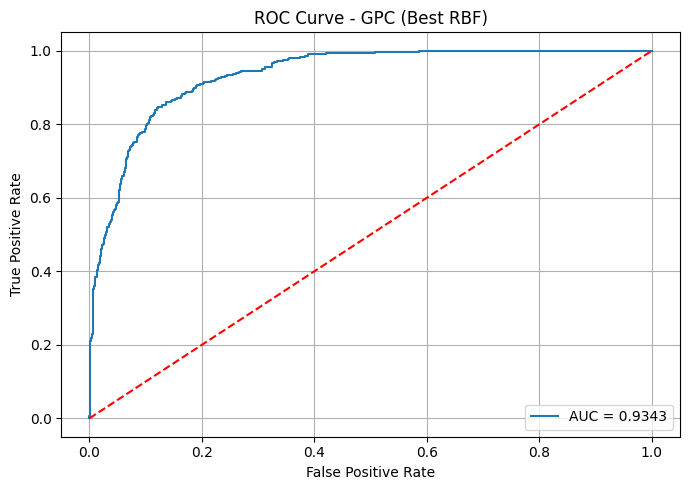

In [42]:
# 1. ROC Curve and AUC
# Ensure y_test is binary (0 or 1) before using roc_curve
y_test_binary = (y_test > 0).astype(int)
fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
auc_score = roc_auc_score(y_test_binary, y_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GPC (Best RBF)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

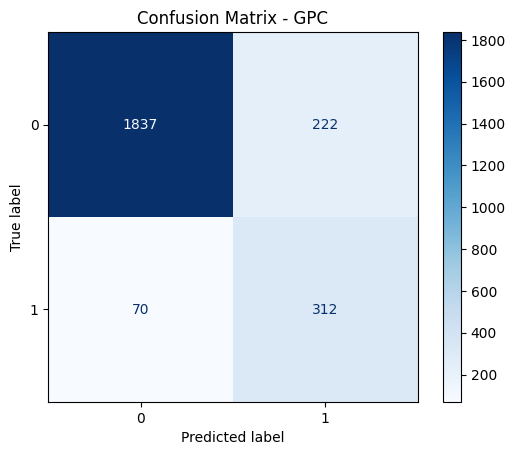

In [43]:
# 2. Confusion Matrix Heatmap
y_test_binary = (y_test > 0).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - GPC")
plt.grid(False)
plt.show()

### ROC Curve and AUC

1. ROC-AUC shows strong model performance (AUC = 0.9177)
2. Indicates excellent ability to separate buyers vs. non-buyers

### Confusion Matrix Summary:
1. TP ( Buyer), TN ( Non-buyer) → High accuracy
2. Some FP/FN → threshold tuning can improve balance

## 2. GPR

In [44]:
# Define features and log-transformed target
X = final_df.drop(columns=['ExitRates'])
y = np.log1p(final_df['ExitRates'])

In [45]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Feature selection
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)

In [47]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Define kernels with flexible length scale bounds
kernels = {
    'RBF': RBF(length_scale=1.0, length_scale_bounds=(1e-6, 1e3)),
    'Matern': Matern(length_scale=1.0, length_scale_bounds=(1e-6, 1e3), nu=1.5),
    'RationalQuadratic': RationalQuadratic(length_scale=1.0, alpha=1.0, length_scale_bounds=(1e-6, 1e3))
}

# Evaluate different kernels
results = {}
for name, kernel in kernels.items():
    gpr = GaussianProcessRegressor(kernel=kernel, optimizer=None, alpha=1e-2, normalize_y=True)
    gpr.fit(X_train, y_train)

    y_pred_log = gpr.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results[name] = {
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4),
        'R²': round(r2, 4)
    }

In [48]:
results

{'RBF': {'RMSE': np.float64(0.464), 'MAE': 0.2964, 'R²': 0.7865},
 'Matern': {'RMSE': np.float64(0.4187), 'MAE': 0.2714, 'R²': 0.8261},
 'RationalQuadratic': {'RMSE': np.float64(0.3705),
  'MAE': 0.2521,
  'R²': 0.8638}}

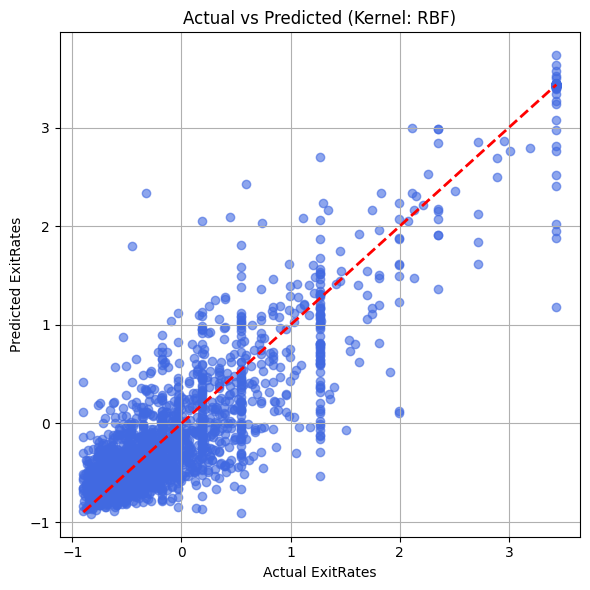

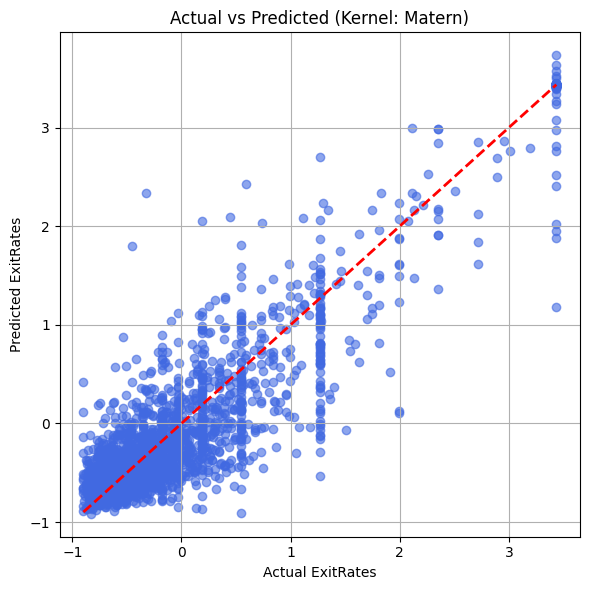

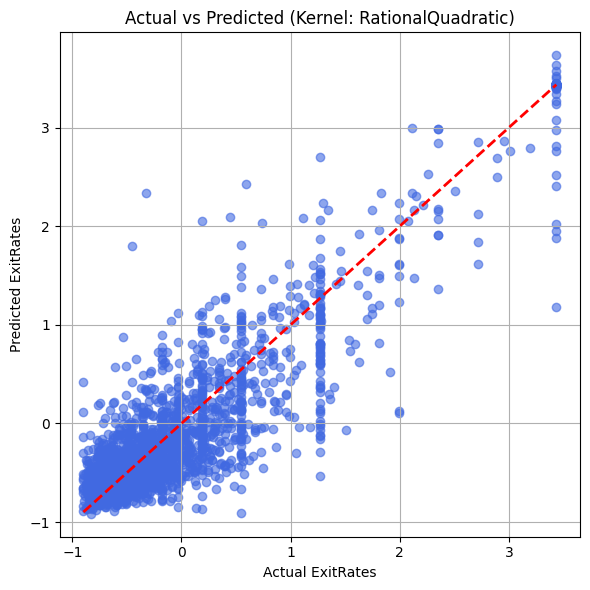

In [49]:
for name, kernel in kernels.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='royalblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual ExitRates")
    plt.ylabel("Predicted ExitRates")
    plt.title(f"Actual vs Predicted (Kernel: {name})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Actual vs Predicted Interpretation:
1. Interpretation: Predictions follow the red line → good model fit.
2. RationalQuadratic kernel captures variance best with minimal deviation.


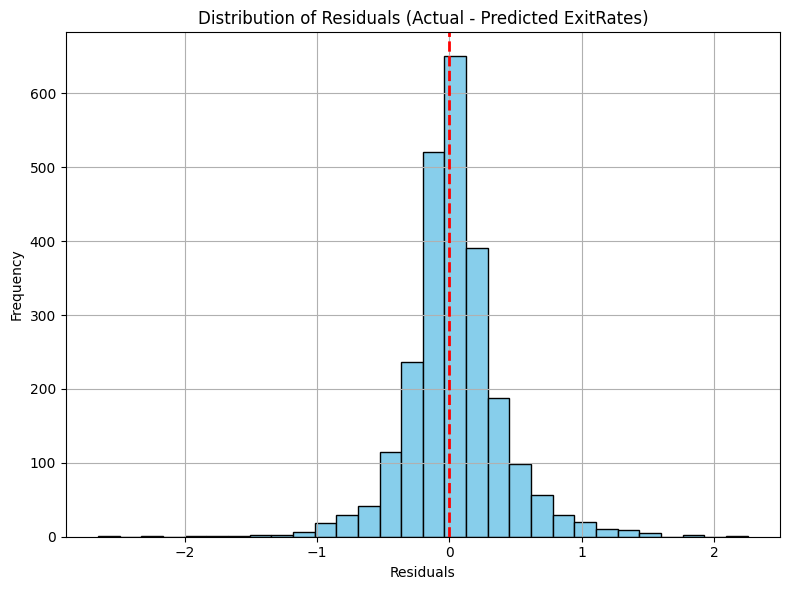

In [50]:
# Calculate residuals and Plot histogram of residuals
residuals = y_true - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Residuals (Actual - Predicted ExitRates)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### Distribution of Residuals (Actual - Predicted ExitRates) Interpretation
Residuals are centered near 0 and symmetrically distributed → model predictions are unbiased and stable


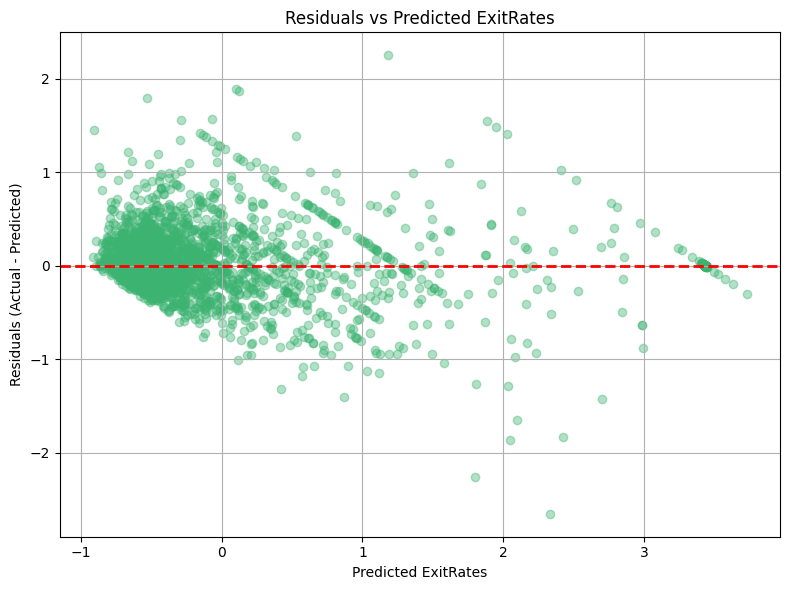

In [51]:
# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.4, color='mediumseagreen')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted ExitRates")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted ExitRates")
plt.grid(True)
plt.tight_layout()
plt.show()

### Residuals vs Predicted ExitRates Interpretation
1. Residuals are symmetrically spread around zero → unbiased, stable predictions
2. No clear pattern → GPR assumptions hold (no major under/overfitting)

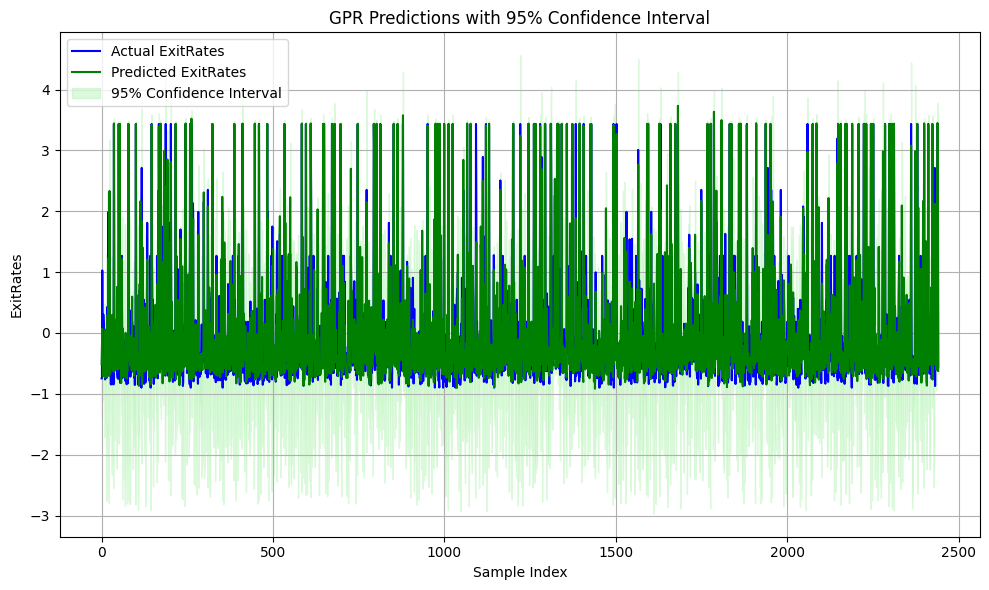

In [52]:
gpr_best = gpr
# Predict with return_std=True to get standard deviation (uncertainty)
y_pred_log, y_std_log = gpr_best.predict(X_test, return_std=True)

# Convert from log scale
y_pred = np.expm1(y_pred_log)
y_std = np.expm1(y_std_log)
y_true = np.expm1(y_test)

# Plot predictions with 95% confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_true)), y_true, 'b-', label='Actual ExitRates')
plt.plot(range(len(y_pred)), y_pred, 'g-', label='Predicted ExitRates')
plt.fill_between(
    range(len(y_pred)),
    y_pred - 1.96 * y_std,
    y_pred + 1.96 * y_std,
    alpha=0.3,
    color='lightgreen',
    label='95% Confidence Interval'
)
plt.xlabel("Sample Index")
plt.ylabel("ExitRates")
plt.title("GPR Predictions with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### GPR Predictions with 95% Confidence Interval
1. Visualizes GPR predictions along with 95% confidence intervals
2. Wider intervals indicate greater uncertainty, typically near sparse data
3. Useful to assess model reliability across different input ranges




In [53]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

gpr_best = gpr
y_pred_log, y_std_log = gpr_best.predict(X_test, return_std=True)
y_pred = np.expm1(y_pred_log)
y_std = np.expm1(y_std_log)
y_true = np.expm1(y_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_test, y_std)
# Fit surrogate model to predict uncertainty (std) using input features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_test, y_std)

# Getting feature names from SelectKBest
selected_mask = selector.get_support()
feature_names = np.array(X.columns)[selected_mask]

# Feature importances for uncertainty
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [54]:
importance_df

,Feature,Importance
3,Informational_Duration,0.214326
2,Informational,0.181586
7,PageValues,0.128814
0,Administrative,0.082868
9,TrafficType,0.076912
4,ProductRelated,0.069748
5,ProductRelated_Duration,0.056245
6,BounceRates,0.033799
11,Revenue,0.031480
1,Administrative_Duration,0.028210


### Interpretation:
1. Informational_Duration, Informational, and PageValues contribute most to prediction uncertainty.
2. These features affect GPR's confidence the most, while temporal/monthly features contribute least.
3. Helps identify which features drive model variability and where predictions are less certain.


In [55]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Features and target
X = final_df.drop(columns='Revenue')
y = final_df['Revenue'].astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= 0.6).astype(int)
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4)
    })

results_df = pd.DataFrame(results)

In [56]:
print(results_df)

                 Model  Accuracy  F1 Score  Precision  Recall
0  Logistic Regression    0.9000    0.6235     0.7594  0.5288
1        Random Forest    0.8992    0.6032     0.7857  0.4895


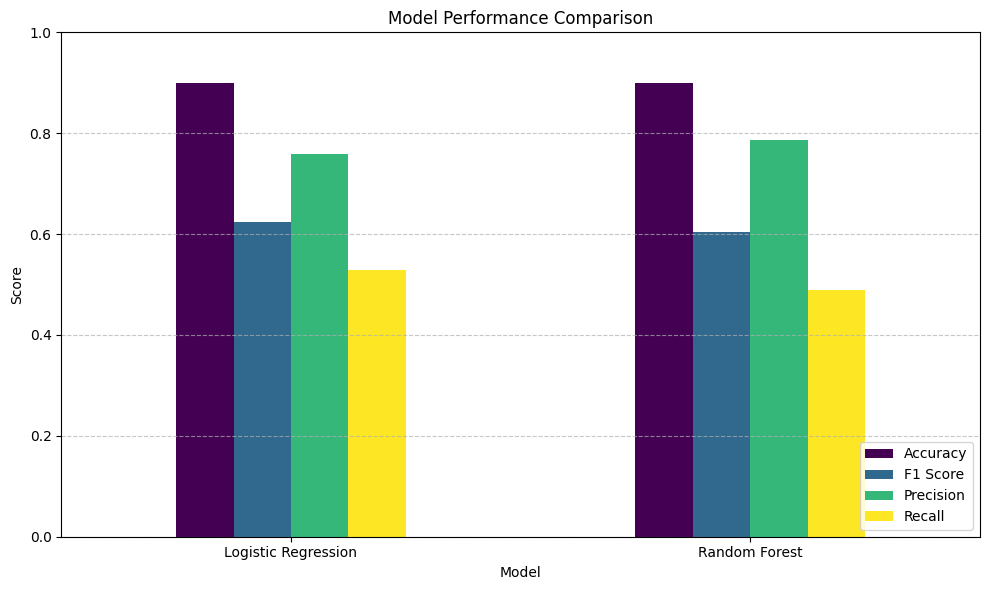

In [57]:
results_df.set_index("Model")[["Accuracy", "F1 Score", "Precision", "Recall"]].plot(
    kind="bar", figsize=(10, 6), colormap="viridis", rot=0
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()